#1. 📌 Extracción

In [122]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data=pd.read_json('/content/drive/MyDrive/Challenge_2/TelecomX_Data.json')
costumer_df=pd.json_normalize(data['customer'])
phone_df=pd.json_normalize(data['phone'])
internet_df=pd.json_normalize(data['internet'])
account_df=pd.json_normalize(data['account'])
df_total=pd.concat([data[['customerID','Churn']],costumer_df,phone_df,internet_df,account_df],axis=1)
df_total.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [123]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [124]:
# Guardar en CSV
df_total.to_csv('data_acomodada.csv', index=False, encoding='utf-8')

print("Archivo CSV generado correctamente.")

Archivo CSV generado correctamente.


#2. 🔧 Transformación

## 2.1 Conocer conjunto de datos

In [125]:
# 1. Ver valores ausentes
print("Valores nulos por columna:")
print(df_total.isnull().sum())

Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


## 2.2 Comprobacion de incoherencias

In [126]:
# A. Ver duplicados
duplicados = df_total.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")


Filas duplicadas: 0


In [127]:
# B. Revisar formatos de columnas categóricas
print("\nValores únicos por columna categórica:")
for col in df_total.select_dtypes(include='object').columns:
    print(f"{col}: {df_total[col].unique()}")


Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [128]:
# C. Revisar rangos y coherencia en columnas numéricas
print("\nEstadísticas descriptivas de columnas numéricas:")
print(df_total.describe())


Estadísticas descriptivas de columnas numéricas:
       SeniorCitizen       tenure  Charges.Monthly
count    7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498        64.720098
std         0.369074    24.571773        30.129572
min         0.000000     0.000000        18.250000
25%         0.000000     9.000000        35.425000
50%         0.000000    29.000000        70.300000
75%         0.000000    55.000000        89.875000
max         1.000000    72.000000       118.750000


In [129]:
# D. Buscar todas las coincidencias
mask = df_total.isin(['No internet service', 'No phone service'])

# Ver solo las filas y columnas donde aparece
coincidencias = df_total[mask.any(axis=1)]
print(coincidencias)

# Ver lista de columnas donde hay coincidencias
columnas_con_valores = mask.any().index[mask.any()].tolist()
print("Columnas con esos valores:", columnas_con_valores)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
10    0017-DINOC    No    Male              0      No         No      54   
14    0019-GFNTW    No  Female              0      No         No      56   
16    0020-JDNXP    No  Female              0     Yes        Yes      34   
19    0023-HGHWL   Yes    Male              1      No         No       1   
20    0023-UYUPN    No  Female              1     Yes         No      50   
...          ...   ...     ...            ...     ...        ...     ...   
7252  9972-EWRJS    No  Female              0     Yes        Yes      67   
7256  9975-GPKZU    No    Male              0     Yes        Yes      46   
7257  9975-SKRNR    No    Male              0      No         No       1   
7261  9986-BONCE   Yes  Female              0      No         No       4   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
10    

## 2.3 Manejo de Inconsistencias

In [130]:
df_total = df_total.replace({
    'No internet service': 'No',
    'No phone service': 'No'
})

print("\nValores únicos por columna categórica:")
for col in df_total.select_dtypes(include='object').columns:
    print(f"{col}: {df_total[col].unique()}")


Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [131]:
# Borrar filas donde Churn está vacío
df_total = df_total[df_total['Churn'] != '']
df_total=df_total[df_total['Churn'] != ' ']
print("\nValores únicos por columna categórica:")
for col in df_total.select_dtypes(include='object').columns:
    print(f"{col}: {df_total[col].unique()}")


Valores únicos por columna categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


## 2.4 Columna de cuentas diarias

In [132]:
# Crear columna 'Cuentas_Diarias' dividiendo el cargo mensual entre 30 días
df_total['Cuentas_Diarias'] = df_total['Charges.Monthly'] / 30
df_total['Cuentas_Diarias']=df_total['Cuentas_Diarias'].round(2)
# Verificar resultado
print(df_total[['Charges.Monthly', 'Cuentas_Diarias']].head())

   Charges.Monthly  Cuentas_Diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80


##2.5 Estandarización y transformación de datos

In [133]:
# Trabajar sobre una copia
datos_std = df_total.copy()

# 1) Binarias Yes/No -> 1/0
binarias = [
    'Churn','Partner','Dependents','PhoneService','MultipleLines',
    'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
    'StreamingTV','StreamingMovies','PaperlessBilling'
]
datos_std[binarias] = datos_std[binarias].replace({'Yes':1,'No':0})

# 2) Otras conversiones simples
# gender -> 1/0 (Male/Female)
datos_std['gender'] = datos_std['gender'].replace({'Male':1,'Female':0})

# SeniorCitizen ya suele ser 0/1; por si acaso:
datos_std['SeniorCitizen'] = pd.to_numeric(datos_std['SeniorCitizen'], errors='coerce').fillna(0).astype(int)

# 3) Asegurar numéricos
datos_std['Charges.Monthly'] = pd.to_numeric(datos_std['Charges.Monthly'], errors='coerce')
datos_std['Charges.Total']   = pd.to_numeric(datos_std['Charges.Total'],   errors='coerce')
datos_std['Cuentas_Diarias']= pd.to_numeric(datos_std['Cuentas_Diarias'],   errors='coerce')

# (Opcional) Renombrar a español más claro
datos_std = datos_std.rename(columns={
    'customerID':'ID_Cliente',
    'Churn':'Dejo_Empresa',
    'gender':'Genero',
    'Partner':'Pareja',
    'tenure':'Meses_Contrato',
    'Dependents':'Dependientes',
    'SeniorCitizen':'Adulto_Mayor',
    'PhoneService':'Servicio_Telefono',
    'MultipleLines':'Multiples_Lineas',
    'InternetService':'Servicio_Internet',
    'OnlineSecurity':'Seguridad_Online',
    'OnlineBackup':'Respaldo_Online',
    'DeviceProtection':'Proteccion_Dispositivo',
    'TechSupport':'Soporte_Tecnico',
    'StreamingTV':'TV_Streaming',
    'StreamingMovies':'Peliculas_Streaming',
    'PaperlessBilling':'Factura_Digital',
    'Charges.Monthly':'Cargo_Mensual',
    'Charges.Total':'Cargo_Total',
    'Contract':'Tipo_Contrato',
    'PaymentMethod':'Metodo_Pago'
})

# Revisa el resultado
print(datos_std.head(3))
datos_std.info()

/tmp/ipython-input-873983523.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_std[binarias] = datos_std[binarias].replace({'Yes':1,'No':0})
/tmp/ipython-input-873983523.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_std['gender'] = datos_std['gender'].replace({'Male':1,'Female':0})


   ID_Cliente  Dejo_Empresa  Genero  Adulto_Mayor  Pareja  Dependientes  \
0  0002-ORFBO             0       0             0       1             1   
1  0003-MKNFE             0       1             0       0             0   
2  0004-TLHLJ             1       1             0       0             0   

   Meses_Contrato  Servicio_Telefono  Multiples_Lineas Servicio_Internet  ...  \
0               9                  1                 0               DSL  ...   
1               9                  1                 1               DSL  ...   
2               4                  1                 0       Fiber optic  ...   

   Proteccion_Dispositivo  Soporte_Tecnico  TV_Streaming  Peliculas_Streaming  \
0                       0                1             1                    0   
1                       0                0             0                    1   
2                       1                0             0                    0   

    Tipo_Contrato  Factura_Digital       Metodo_P

In [134]:
#Logramos verificar que habia Cargo_total en vacio, entonces eliminaremos esas filas
datos_std = datos_std.dropna(subset=['Cargo_Total'])
datos_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Dejo_Empresa            7032 non-null   int64  
 2   Genero                  7032 non-null   int64  
 3   Adulto_Mayor            7032 non-null   int64  
 4   Pareja                  7032 non-null   int64  
 5   Dependientes            7032 non-null   int64  
 6   Meses_Contrato          7032 non-null   int64  
 7   Servicio_Telefono       7032 non-null   int64  
 8   Multiples_Lineas        7032 non-null   int64  
 9   Servicio_Internet       7032 non-null   object 
 10  Seguridad_Online        7032 non-null   int64  
 11  Respaldo_Online         7032 non-null   int64  
 12  Proteccion_Dispositivo  7032 non-null   int64  
 13  Soporte_Tecnico         7032 non-null   int64  
 14  TV_Streaming            7032 non-null   int64

In [135]:
print("\nValores únicos por columna categórica:")
for col in datos_std.columns:
    print(f"{col}: {datos_std[col].unique()}")


Valores únicos por columna categórica:
ID_Cliente: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Dejo_Empresa: [0 1]
Genero: [0 1]
Adulto_Mayor: [0 1]
Pareja: [1 0]
Dependientes: [1 0]
Meses_Contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Servicio_Telefono: [1 0]
Multiples_Lineas: [0 1]
Servicio_Internet: ['DSL' 'Fiber optic' 'No']
Seguridad_Online: [0 1]
Respaldo_Online: [1 0]
Proteccion_Dispositivo: [0 1]
Soporte_Tecnico: [1 0]
TV_Streaming: [1 0]
Peliculas_Streaming: [0 1]
Tipo_Contrato: ['One year' 'Month-to-month' 'Two year']
Factura_Digital: [1 0]
Metodo_Pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Cargo_Mensual: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Cargo_Total: [ 593.3   542.4   280.85 ...  742.9  4627.65

#📊 Carga y análisis

##3.1 Analisis Descriptivo

In [136]:
#Tomando solo las variables cuantitativas
import pandas as pd

columnas_numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias']

# Análisis descriptivo
analisis = datos_std[columnas_numericas].describe()

# Calcular también la mediana (porque describe no la incluye por defecto)
analisis.loc['median'] = datos_std[columnas_numericas].median()

print(analisis)

        Meses_Contrato  Cargo_Mensual  Cargo_Total  Cuentas_Diarias
count      7032.000000    7032.000000  7032.000000      7032.000000
mean         32.421786      64.798208  2283.300441         2.159891
std          24.545260      30.085974  2266.771362         1.002955
min           1.000000      18.250000    18.800000         0.610000
25%           9.000000      35.587500   401.450000         1.187500
50%          29.000000      70.350000  1397.475000         2.340000
75%          55.000000      89.862500  3794.737500         2.992500
max          72.000000     118.750000  8684.800000         3.960000
median       29.000000      70.350000  1397.475000         2.340000


##3.2 Distribucion de evasion

/tmp/ipython-input-1269244936.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")


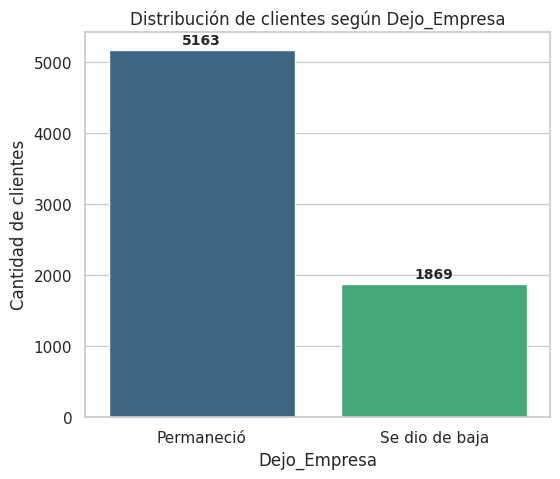

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable Dejo_Empresa
conteo = datos_std['Dejo_Empresa'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,5))
ax = sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")

# Etiquetas en las barras
for i, valor in enumerate(conteo.values):
    ax.text(i, valor + 50, str(valor), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks([0, 1], ["Permaneció", "Se dio de baja"])
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de clientes según Dejo_Empresa")
plt.show()

In [138]:
datos_std = datos_std.drop(columns=['ID_Cliente'])

##3.3 Recuento de evasión por variables categóricas

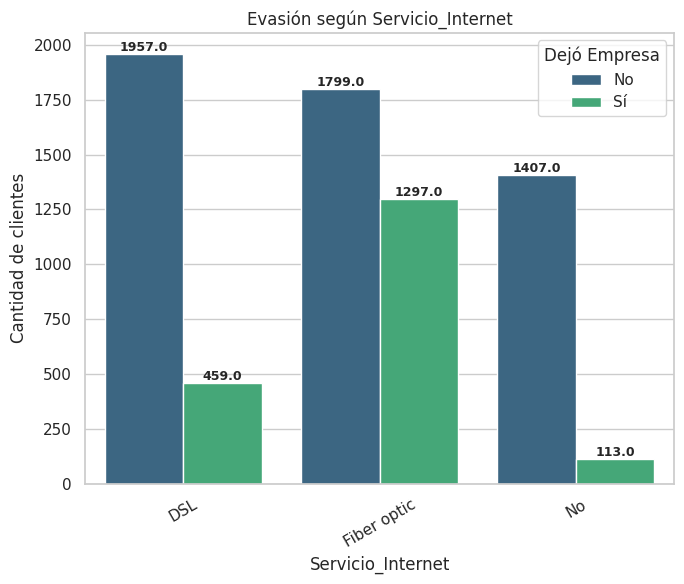

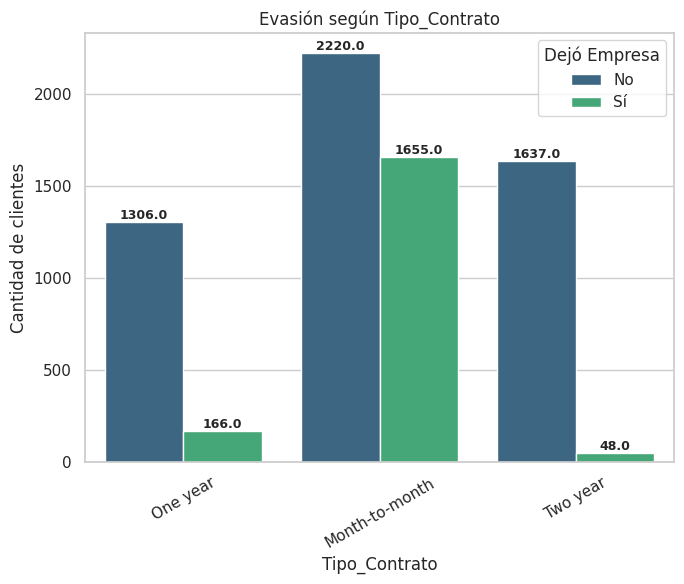

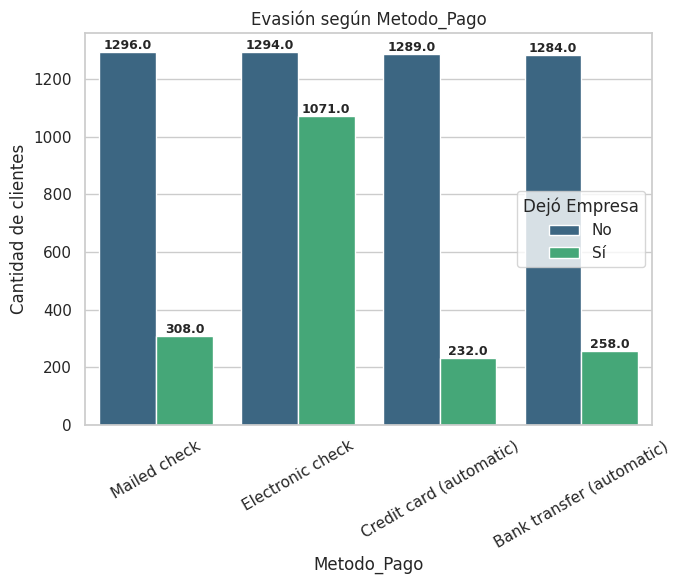

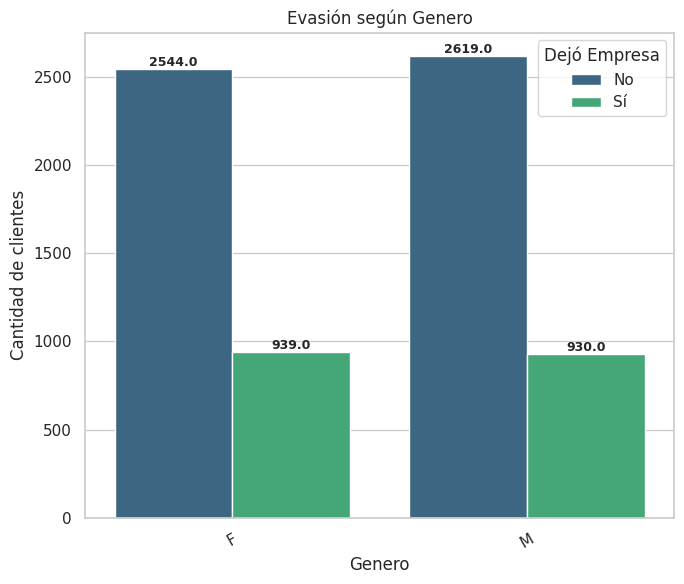

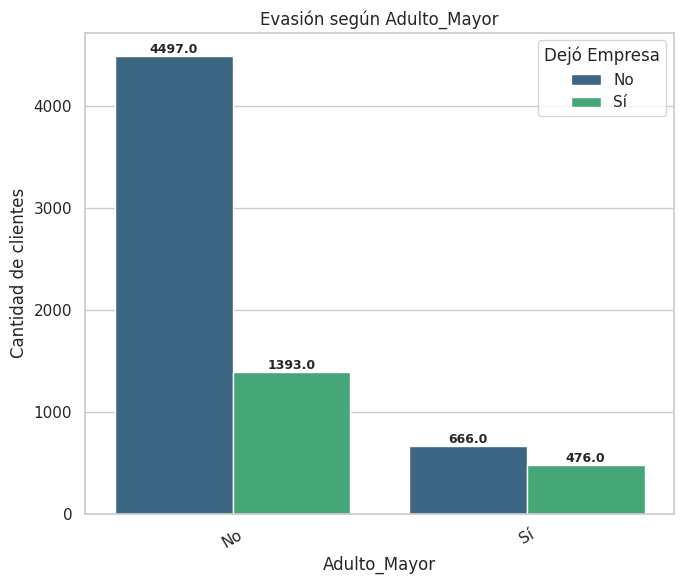

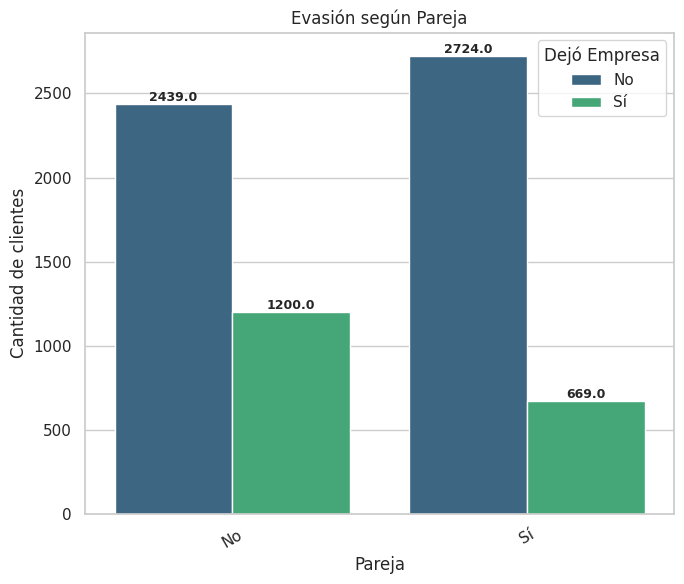

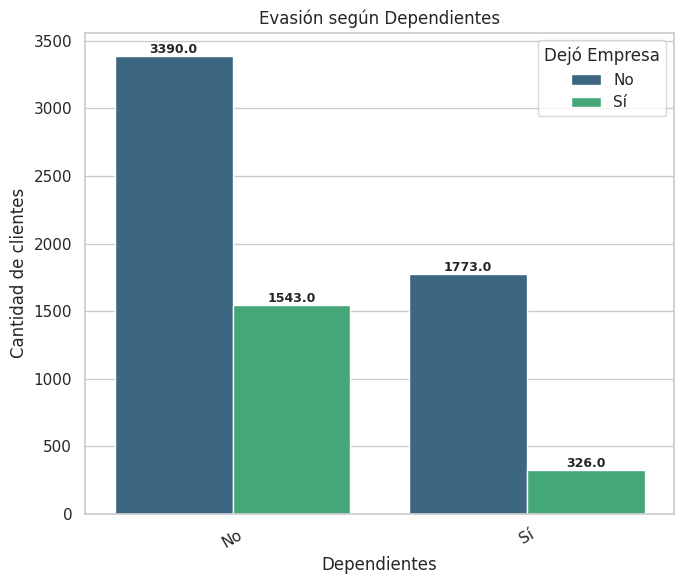

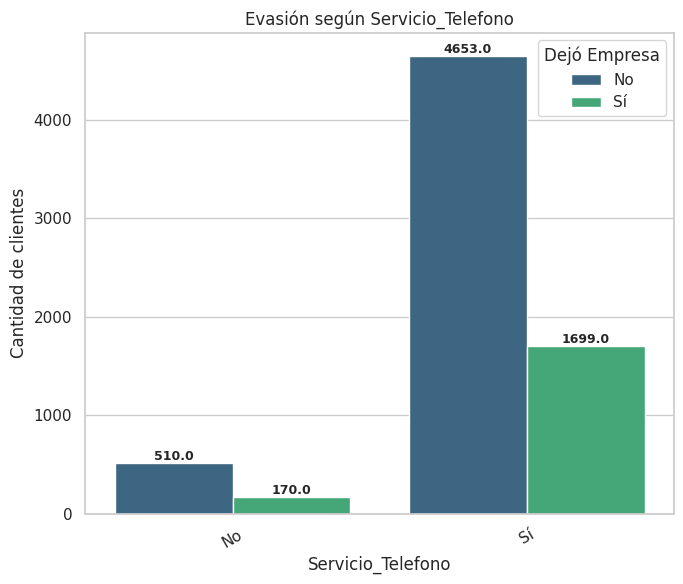

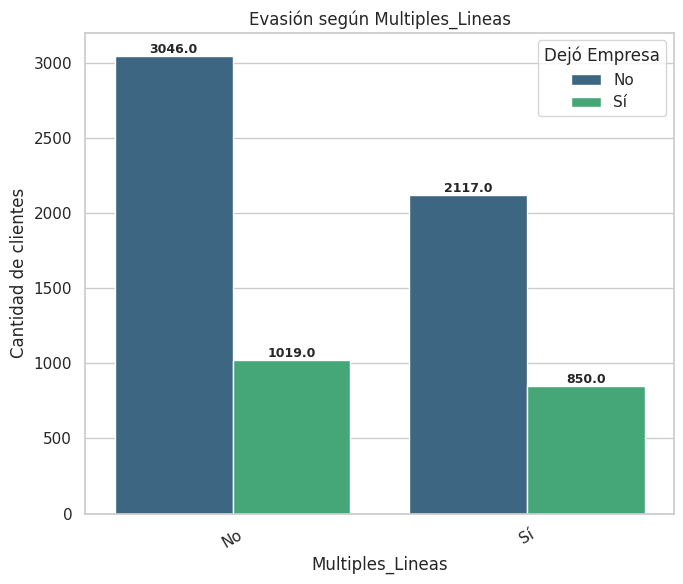

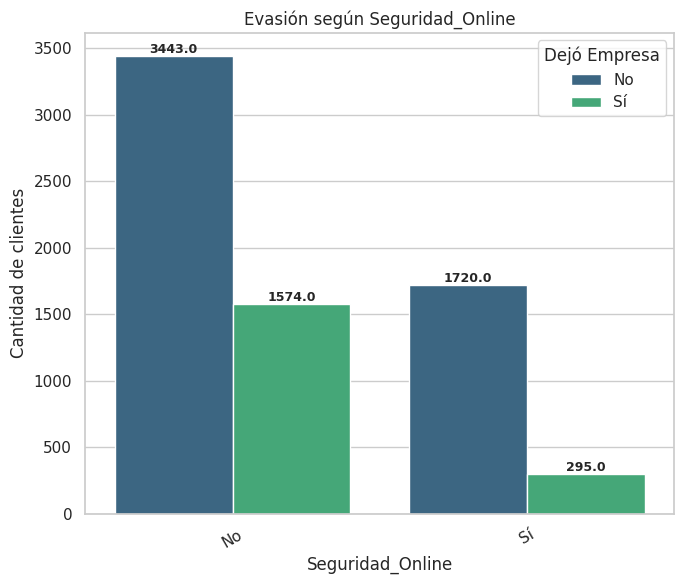

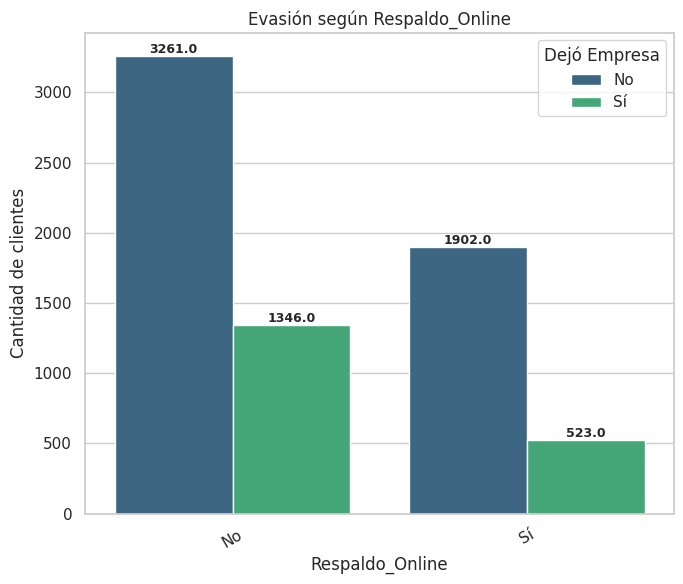

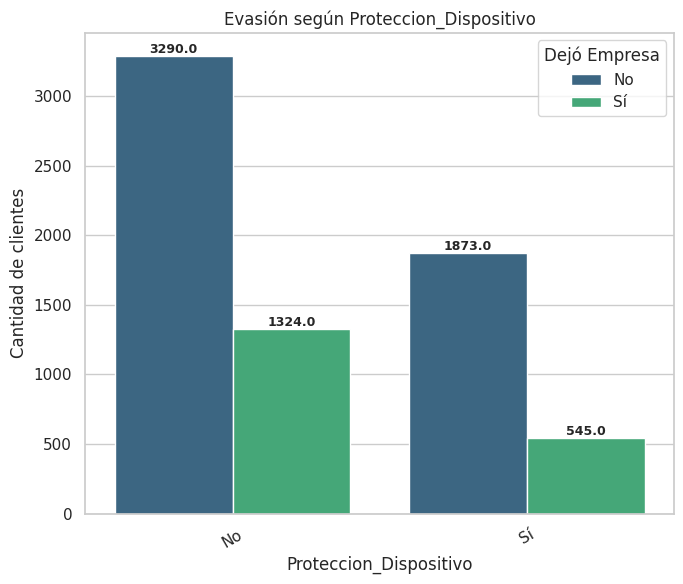

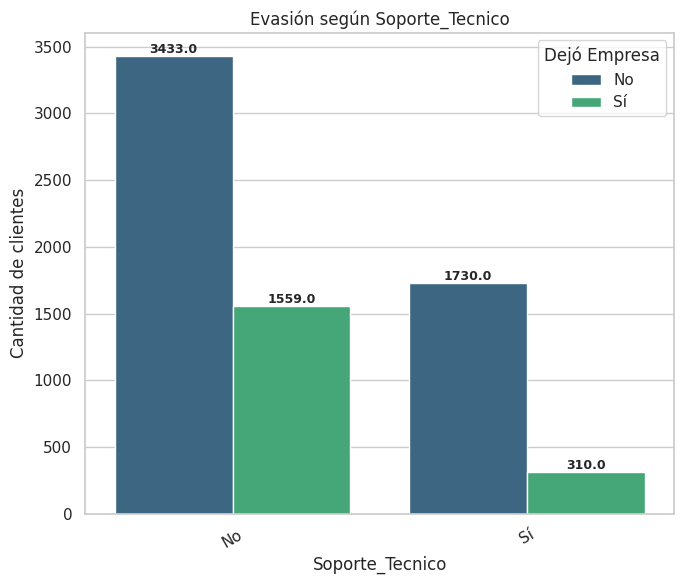

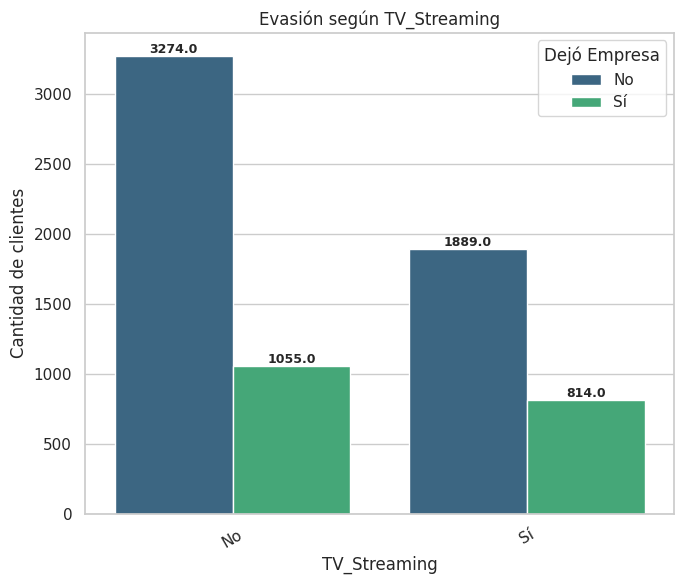

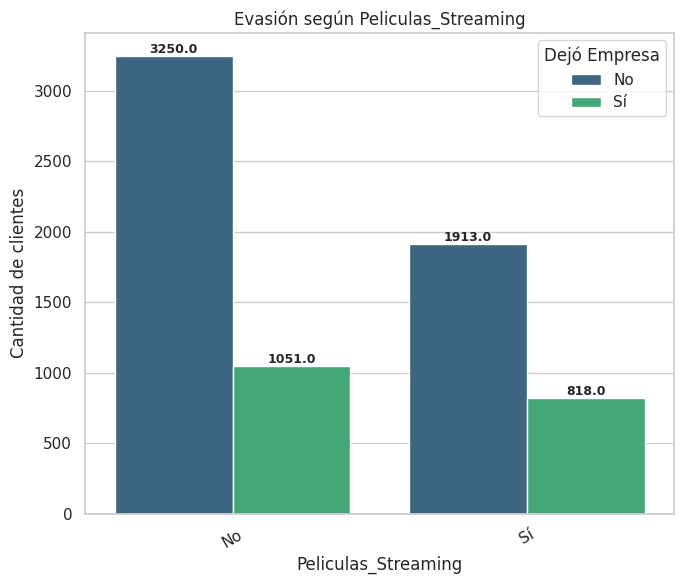

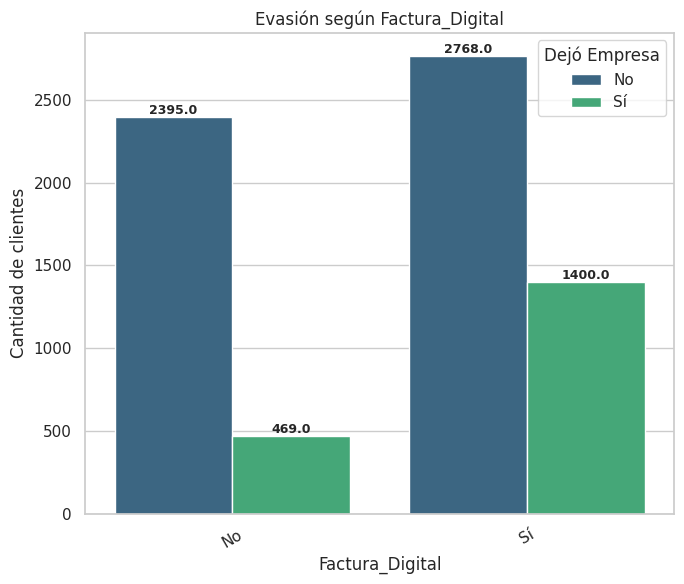

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.api.types as ptypes

# --- Asegurar mapeo Genero: M=1, F=0 ---
if ptypes.is_object_dtype(datos_std['Genero']):
    datos_std['Genero'] = datos_std['Genero'].map({'M': 1, 'F': 0}).astype('int64')

# --- Detectar variables categóricas ---
cat_obj = datos_std.select_dtypes(include=['object']).columns.tolist()
cat_bin = [c for c in datos_std.select_dtypes(include=['int64']).columns
           if datos_std[c].nunique() == 2 and c != 'Dejo_Empresa']
variables_categoricas = cat_obj + cat_bin

# --- Mapas de etiquetas para mostrar ---
default_bin_labels = {0: 'No', 1: 'Sí'}
special_labels = {
    'Genero': {0: 'F', 1: 'M'}  # SOLO Genero
}

for var in variables_categoricas:
    # Construir columna temporal con etiquetas legibles
    if var in special_labels:
        x_labels = datos_std[var].map(special_labels[var])
        x_order = [special_labels[var][0], special_labels[var][1]]  # ['F','M']
    elif ptypes.is_integer_dtype(datos_std[var]) and datos_std[var].nunique() == 2:
        x_labels = datos_std[var].map(default_bin_labels)
        x_order = [default_bin_labels[0], default_bin_labels[1]]   # ['No','Sí']
    else:
        x_labels = datos_std[var]  # ya es object/categoría
        x_order = None  # dejar que seaborn ordene por defecto

    # DataFrame para graficar
    tmp = pd.DataFrame({
        var: x_labels,
        'Dejo_Empresa': datos_std['Dejo_Empresa']
    })

    plt.figure(figsize=(7,6))
    ax = sns.countplot(
        data=tmp, x=var, hue='Dejo_Empresa',
        order=x_order, hue_order=[0, 1], palette='viridis'
    )

    # Números encima de cada barra
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{h}', (p.get_x() + p.get_width()/2., h),
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.title(f"Evasión según {var}")
    plt.ylabel("Cantidad de clientes")
    plt.xlabel(var)
    plt.legend(title="Dejó Empresa", labels=["No", "Sí"])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


##3.4 Conteo de evasión por variables numéricas

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


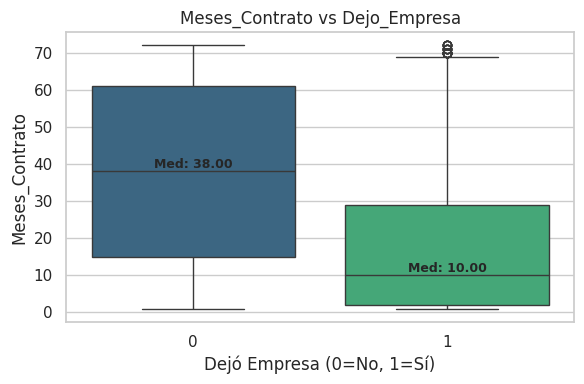

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


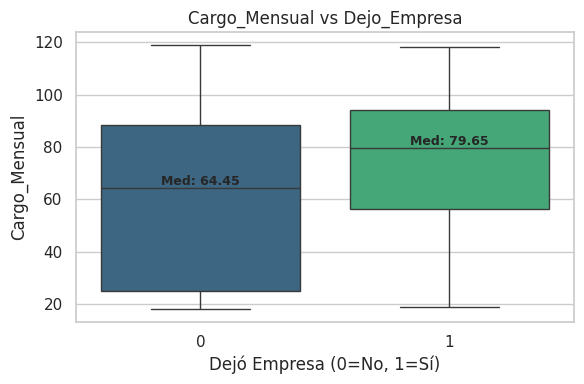

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


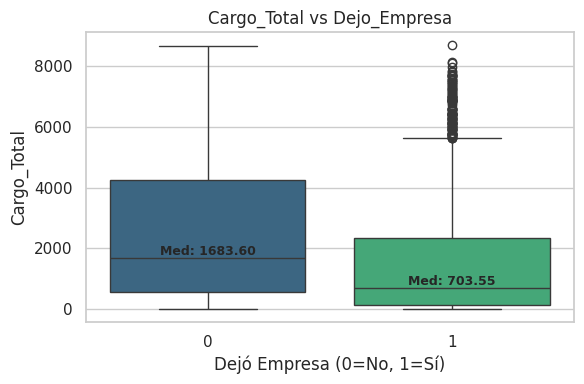

/tmp/ipython-input-4009946713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


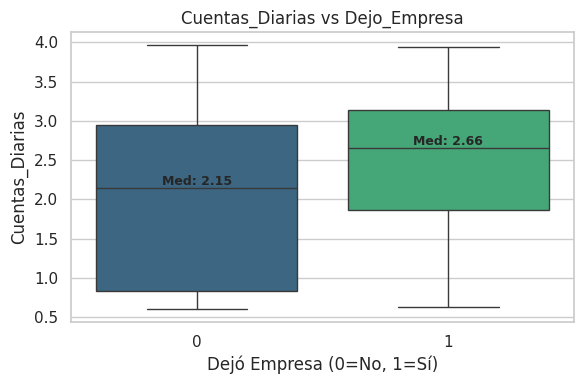

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

TARGET = "Dejo_Empresa"
num_cols = ["Meses_Contrato", "Cargo_Mensual", "Cargo_Total", "Cuentas_Diarias"]

for var in num_cols:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(
        data=datos_std, x=TARGET, y=var,
        order=[0,1], palette="viridis"
    )
    plt.title(f"{var} vs {TARGET}")
    plt.xlabel("Dejó Empresa (0=No, 1=Sí)")
    plt.ylabel(var)

    # Medianas anotadas
    med = datos_std.groupby(TARGET)[var].median()
    for x, lab in enumerate([0, 1]):
        y = med.loc[lab]
        ax.text(x, y, f"Med: {y:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

    plt.tight_layout()
    plt.show()

#🛠️ Preparación de los Datos

In [141]:
datos_std

,Dejo_Empresa,Genero,Adulto_Mayor,Pareja,Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,Seguridad_Online,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0,0,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0,1,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,1,1,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,1,1,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,1,0,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,DSL,1,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,1,1,0,1,0,22,1,1,Fiber optic,0,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,0,1,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,0,1,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [142]:
datos_std.columns

Index(['Dejo_Empresa', 'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes',
       'Meses_Contrato', 'Servicio_Telefono', 'Multiples_Lineas',
       'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming',
       'Peliculas_Streaming', 'Tipo_Contrato', 'Factura_Digital',
       'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias'],
      dtype='object')

In [143]:
print("\nValores únicos por columna categórica:")
for col in datos_std.columns:
    print(f"{col}: {datos_std[col].unique()}")


Valores únicos por columna categórica:
Dejo_Empresa: [0 1]
Genero: [0 1]
Adulto_Mayor: [0 1]
Pareja: [1 0]
Dependientes: [1 0]
Meses_Contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Servicio_Telefono: [1 0]
Multiples_Lineas: [0 1]
Servicio_Internet: ['DSL' 'Fiber optic' 'No']
Seguridad_Online: [0 1]
Respaldo_Online: [1 0]
Proteccion_Dispositivo: [0 1]
Soporte_Tecnico: [1 0]
TV_Streaming: [1 0]
Peliculas_Streaming: [0 1]
Tipo_Contrato: ['One year' 'Month-to-month' 'Two year']
Factura_Digital: [1 0]
Metodo_Pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Cargo_Mensual: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
Cargo_Total: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Cuentas_Diarias: [2.19 2.   2.46 3.27 2.8  2.31 3.66 2.82 1.61 3.02 1.51 3.89 2.3  3.38

In [144]:
X = datos_std.drop('Dejo_Empresa', axis = 1)
y = datos_std['Dejo_Empresa']

##4.1 Encoding

In [145]:
from sklearn.compose import make_column_transformer #Nos ayuda a generar un transformado de columna
from sklearn.preprocessing import OneHotEncoder #Importamos OneHotEncoder, que nos sirve ha hacer la transformacion en 1's y 0's

In [146]:
columnas = X.columns
columnas

Index(['Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses_Contrato',
       'Servicio_Telefono', 'Multiples_Lineas', 'Servicio_Internet',
       'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
       'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming',
       'Tipo_Contrato', 'Factura_Digital', 'Metodo_Pago', 'Cargo_Mensual',
       'Cargo_Total', 'Cuentas_Diarias'],
      dtype='object')

In [147]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']
),
    remainder = 'passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)
one_hot

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  sparse_threshold=0,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['Servicio_Internet', 'Tipo_Contrato',
                                  'Metodo_Pago'])])

In [148]:
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__Servicio_Internet_DSL',
       'onehotencoder__Servicio_Internet_Fiber optic',
       'onehotencoder__Servicio_Internet_No',
       'onehotencoder__Tipo_Contrato_Month-to-month',
       'onehotencoder__Tipo_Contrato_One year',
       'onehotencoder__Tipo_Contrato_Two year',
       'onehotencoder__Metodo_Pago_Bank transfer (automatic)',
       'onehotencoder__Metodo_Pago_Credit card (automatic)',
       'onehotencoder__Metodo_Pago_Electronic check',
       'onehotencoder__Metodo_Pago_Mailed check', 'remainder__Genero',
       'remainder__Adulto_Mayor', 'remainder__Pareja',
       'remainder__Dependientes', 'remainder__Meses_Contrato',
       'remainder__Servicio_Telefono', 'remainder__Multiples_Lineas',
       'remainder__Seguridad_Online', 'remainder__Respaldo_Online',
       'remainder__Proteccion_Dispositivo', 'remainder__Soporte_Tecnico',
       'remainder__TV_Streaming', 'remainder__Peliculas_Streaming',
       'remainder__Factura_Digital', 'remainder__Cargo_

In [149]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(columnas))

,onehotencoder__Servicio_Internet_DSL,onehotencoder__Servicio_Internet_Fiber optic,onehotencoder__Servicio_Internet_No,onehotencoder__Tipo_Contrato_Month-to-month,onehotencoder__Tipo_Contrato_One year,onehotencoder__Tipo_Contrato_Two year,onehotencoder__Metodo_Pago_Bank transfer (automatic),onehotencoder__Metodo_Pago_Credit card (automatic),onehotencoder__Metodo_Pago_Electronic check,onehotencoder__Metodo_Pago_Mailed check,...,remainder__Seguridad_Online,remainder__Respaldo_Online,remainder__Proteccion_Dispositivo,remainder__Soporte_Tecnico,remainder__TV_Streaming,remainder__Peliculas_Streaming,remainder__Factura_Digital,remainder__Cargo_Mensual,remainder__Cargo_Total,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.19
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,2.00
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.46
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.27
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.84
7028,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.84
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.68
7030,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.26


##4.2 Verificación de la Proporción de Cancelación (Churn)

Conteo:
 Dejo_Empresa
0    5163
1    1869
Name: count, dtype: int64

Proporción (%):
 Dejo_Empresa
0    73.42
1    26.58
Name: proportion, dtype: float64


/tmp/ipython-input-3235938705.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")


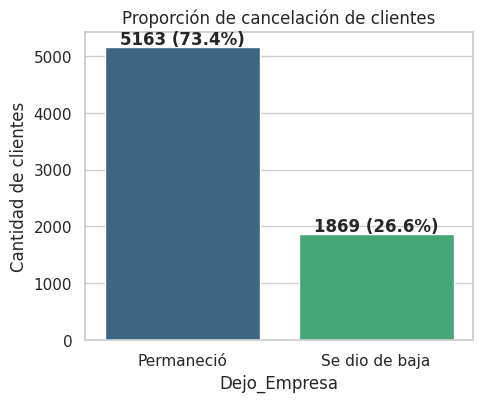

In [150]:
import pandas as pd

# Conteo absoluto
conteo = y.value_counts()
print("Conteo:\n", conteo)

# Proporción relativa (%)
proporcion = y.value_counts(normalize=True) * 100
print("\nProporción (%):\n", proporcion.round(2))

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
ax = sns.barplot(x=conteo.index, y=conteo.values, palette="viridis")
for i, valor in enumerate(conteo.values):
    ax.text(i, valor + 50, f"{valor} ({proporcion[i]:.1f}%)", ha='center', fontweight='bold')

plt.xticks([0, 1], ["Permaneció", "Se dio de baja"])
plt.ylabel("Cantidad de clientes")
plt.title("Proporción de cancelación de clientes")
plt.show()

#🎯 Correlación y Selección de Variables

##5.1 Analisis de Correlacion

In [151]:
#Nuestra variable dependiente sera el precio de venta y veremos que indicadores estan relacionados

# Correlación
# Asegurar que la variable objetivo sea numérica
datos_std['Dejo_Empresa'] = datos_std['Dejo_Empresa'].astype(int)

# Lista de columnas numéricas que quieres correlacionar
num_cols = ["Meses_Contrato", "Cargo_Mensual", "Cargo_Total", "Cuentas_Diarias"]

# Calcular correlaciones con el target
corr = datos_std[num_cols + ['Dejo_Empresa']].corr()['Dejo_Empresa'].drop('Dejo_Empresa')
print(corr.sort_values(ascending=False))

Cuentas_Diarias    0.192914
Cargo_Mensual      0.192858
Cargo_Total       -0.199484
Meses_Contrato    -0.354049
Name: Dejo_Empresa, dtype: float64


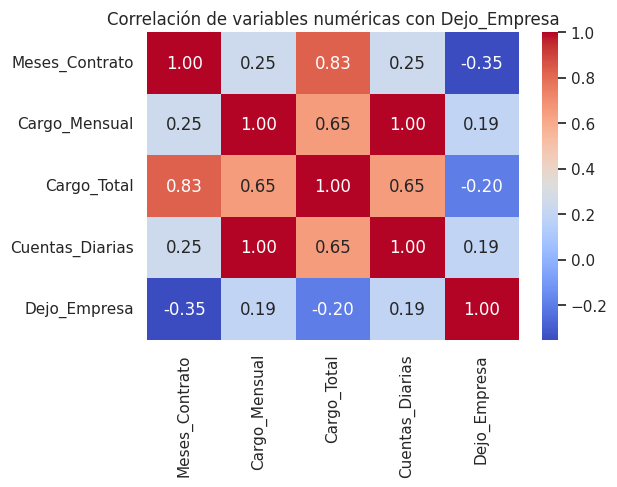

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(datos_std[num_cols + ['Dejo_Empresa']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación de variables numéricas con Dejo_Empresa")
plt.show()

##5.2 Análisis Dirigido

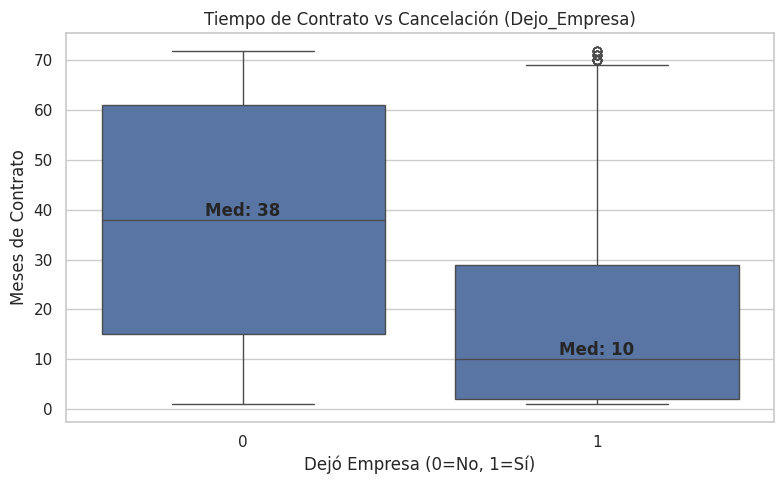

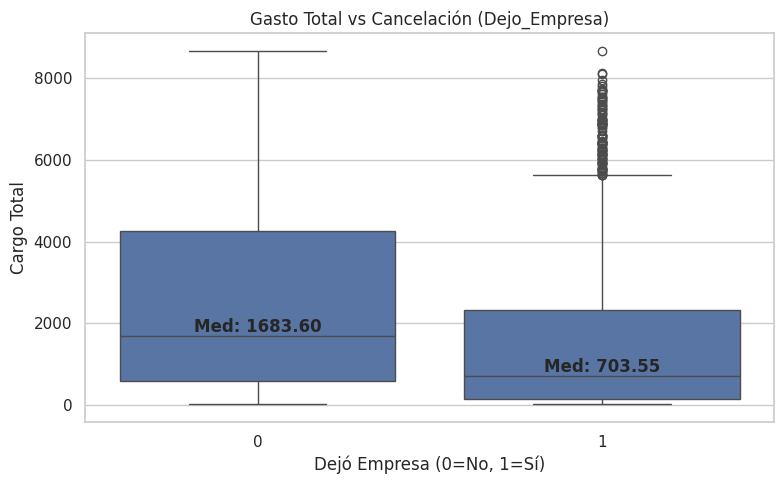

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegura que el target sea numérico (0=No, 1=Sí)
datos_std['Dejo_Empresa'] = datos_std['Dejo_Empresa'].astype(int)

sns.set(style="whitegrid")

# ---------- Boxplot: Meses_Contrato vs Dejo_Empresa ----------
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=datos_std, x='Dejo_Empresa', y='Meses_Contrato')
ax.set_title("Tiempo de Contrato vs Cancelación (Dejo_Empresa)")
ax.set_xlabel("Dejó Empresa (0=No, 1=Sí)")
ax.set_ylabel("Meses de Contrato")

# Medianas sobre las cajas
med0 = datos_std.loc[datos_std['Dejo_Empresa']==0, 'Meses_Contrato'].median()
med1 = datos_std.loc[datos_std['Dejo_Empresa']==1, 'Meses_Contrato'].median()
ax.text(0, med0, f"Med: {med0:.0f}", ha='center', va='bottom', fontweight='bold')
ax.text(1, med1, f"Med: {med1:.0f}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# ---------- Boxplot: Cargo_Total vs Dejo_Empresa ----------
plt.figure(figsize=(8,5))
ax = sns.boxplot(data=datos_std, x='Dejo_Empresa', y='Cargo_Total')
ax.set_title("Gasto Total vs Cancelación (Dejo_Empresa)")
ax.set_xlabel("Dejó Empresa (0=No, 1=Sí)")
ax.set_ylabel("Cargo Total")

# Medianas sobre las cajas
med0 = datos_std.loc[datos_std['Dejo_Empresa']==0, 'Cargo_Total'].median()
med1 = datos_std.loc[datos_std['Dejo_Empresa']==1, 'Cargo_Total'].median()
ax.text(0, med0, f"Med: {med0:.2f}", ha='center', va='bottom', fontweight='bold')
ax.text(1, med1, f"Med: {med1:.2f}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


#🤖 Modelado Predictivo


##6.1 Separación de Datos
Para este caso evaluaremos con 2 modelos con Decision Tree y Random Forest

In [154]:
#Separamos el modelo en 3 secciones: Train, Valid and Test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(X,y,test_size=0.05,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,stratify=y,random_state=5)

## 6.2 Normalizacion para modelo KNN

In [155]:
#Normalizamos datos
from sklearn.preprocessing import MinMaxScaler
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)
X_val_normalizado = normalizacion.transform(X_val)
X_normalizado=normalizacion.transform(X)

##6.3 Creación de Modelos
Antes de entrenar el modelo KNN, se aplicó un escalado Min-Max a todas las variables numéricas.
Esto es esencial en modelos basados en distancias, ya que evita que las variables con mayor magnitud dominen el cálculo de similitudes entre instancias.
Con el escalado, todas las características quedan en el mismo rango [0, 1], asegurando que el peso relativo de cada variable en el cálculo de distancias sea equilibrado.

In [156]:
#Importamos los algoritmos que vamos a usar
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

modelo_arbol = DecisionTreeClassifier(max_depth=3)
#Colocandole profundidad el modelo no ira al 100% porque no comtemplara todo los parametros pero si los necesarios.
modelo_arbol.fit(X_train,y_train)
print(f'La exactitud del modelo DecisionTree con el conjunto de entrenamiento es de: {modelo_arbol.score(X_train,y_train)}')
print(f'La exactitud del modelo DecisionTree con el conjunto de validación es de: {modelo_arbol.score(X_val,y_val)}')
#La exactitud no es un buen indicador para guiarnos, por ello evaluaremos otros parametros

#Metodo KNN, para esto necesitamos normalizar datos.

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_normalizado, y_train) #De esta forma instanciamos el modelo

print(f'La exactitud del modelo KNN con el conjunto de entrenamiento es de: {modelo_knn.score(X_train_normalizado, y_train)}')
print(f'La exactitud del modelo KNN con el conjunto de validación es de: {modelo_knn.score(X_val_normalizado, y_val)}')


La exactitud del modelo DecisionTree con el conjunto de entrenamiento es de: 0.7906187624750499
La exactitud del modelo DecisionTree con el conjunto de validación es de: 0.7844311377245509
La exactitud del modelo KNN con el conjunto de entrenamiento es de: 0.8333333333333334
La exactitud del modelo KNN con el conjunto de validación es de: 0.7616766467065869


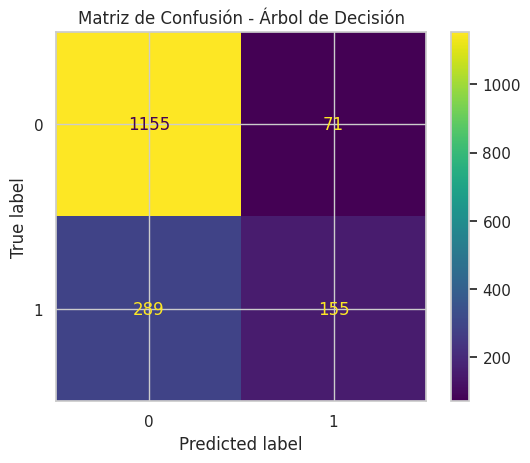

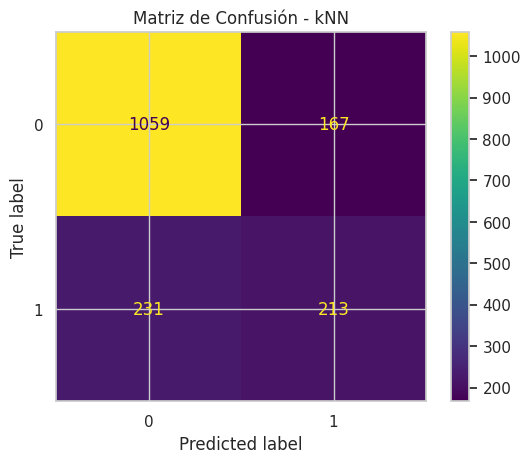

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

prediccion_arbol = modelo_arbol.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_arbol)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

prediccion_rf = modelo_knn.predict(X_val_normalizado)
ConfusionMatrixDisplay.from_predictions(y_val, prediccion_rf)
plt.title("Matriz de Confusión - kNN")
plt.show()

In [158]:
# Evaluando metricas
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
prevision_arbol = modelo_arbol.predict(X_val)

print(f'Precisión (Decision Tree): {accuracy_score(y_val, prevision_arbol)}')
print(f'Recall (Decision Tree): {recall_score(y_val, prevision_arbol)}')
print(f'Precisión (Decision Tree): {precision_score(y_val, prevision_arbol)}')
print(f'F1_Score (Decision Tree): {f1_score(y_val, prevision_arbol)}')
print('-------------------------------------------------------------')
prevision_knn = modelo_knn.predict(X_val_normalizado)
print(f'Precisión (Random KNN): {accuracy_score(y_val, prevision_knn)}')
print(f'Recall (Random KNN): {recall_score(y_val, prevision_knn)}')
print(f'Precisión (Random KNN): {precision_score(y_val, prevision_knn)}')
print(f'F1_Score (Random KNN): {f1_score(y_val, prevision_knn)}')

Precisión (Decision Tree): 0.7844311377245509
Recall (Decision Tree): 0.3490990990990991
Precisión (Decision Tree): 0.6858407079646017
F1_Score (Decision Tree): 0.4626865671641791
-------------------------------------------------------------
Precisión (Random KNN): 0.7616766467065869
Recall (Random KNN): 0.4797297297297297
Precisión (Random KNN): 0.5605263157894737
F1_Score (Random KNN): 0.5169902912621359


In [159]:
def intervalo_conf(resultados,nombre_modelo):
    media=resultados.mean()
    desvio_estandar=resultados.std()
    print(f'Intervalo de confianza ({nombre_modelo}):[{media-2*desvio_estandar}, {min(media + 2*desvio_estandar,1)}]')


from sklearn.model_selection import cross_val_score,StratifiedKFold
arbol=DecisionTreeClassifier(max_depth=5)
knn=KNeighborsClassifier(n_neighbors=15, weights="distance", p=2)

skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=5)

resultado_arbol_stra=cross_val_score(arbol,X,y,cv=skf,scoring='f1')
resultado_knn=cross_val_score(knn,X_normalizado,y,cv=skf,scoring='f1')

intervalo_conf(resultado_arbol_stra,'Decision Tree - F1')
intervalo_conf(resultado_knn,'KNN - F1')

Intervalo de confianza (Decision Tree - F1):[0.5251580751849327, 0.6390755111327953]
Intervalo de confianza (KNN - F1):[0.5008761149946696, 0.5711254297725595]


In [160]:
#Por ultimo hacemos el informe de metricas
from sklearn.metrics import classification_report

print('Decision Tree')
print(classification_report(y_val,prevision_arbol))
print('Knn')
print(classification_report(y_val,prevision_knn))

Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1226
           1       0.69      0.35      0.46       444

    accuracy                           0.78      1670
   macro avg       0.74      0.65      0.66      1670
weighted avg       0.77      0.78      0.76      1670

Knn
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1226
           1       0.56      0.48      0.52       444

    accuracy                           0.76      1670
   macro avg       0.69      0.67      0.68      1670
weighted avg       0.75      0.76      0.76      1670



In [161]:
#Funcion para hallar el intervalo de confianza
def intervalo_confianza(resultados, nombre_modelo):
    valores = resultados['test_score']  # extraemos la lista de puntajes
    media = valores.mean()
    desvio_estandar = valores.std()
    print(f'Intervalo de confianza ({nombre_modelo}): '
          f'[{media - 2*desvio_estandar}, {min(media + 2*desvio_estandar, 1)}]')

#Importamos librerias
from sklearn.model_selection import KFold, cross_validate
# Usamores pipeline de validacion
from imblearn.pipeline import Pipeline as imbpipeline

#Primero evaluamos OVERSAMPLING
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
x_balanceada,y_balanceada = oversampling.fit_resample(X,y)

modelo=KNeighborsClassifier(n_neighbors=15, weights="distance", p=2)
pipeline = imbpipeline([('oversample',SMOTE()),('knn',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados,'KNN - Oversampling')

Intervalo de confianza (KNN - Oversampling): [0.613947548543585, 0.7415454092028939]


In [164]:
#Ahora evaluamos UNDERSAMPLING
from imblearn.under_sampling import NearMiss
modelo=KNeighborsClassifier(n_neighbors=15, weights="distance", p=2)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('knn',modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=5)
cv_resultados =cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados,'KNN - Undersampling')

Intervalo de confianza (KNN - Undersampling): [0.5068246348223667, 0.5872598722198868]


#📋 Interpretación y Conclusiones

## 7.1 Análisis de la Importancia de las Variables

Text(0, 0.5, 'Δ de la métrica por permutación')

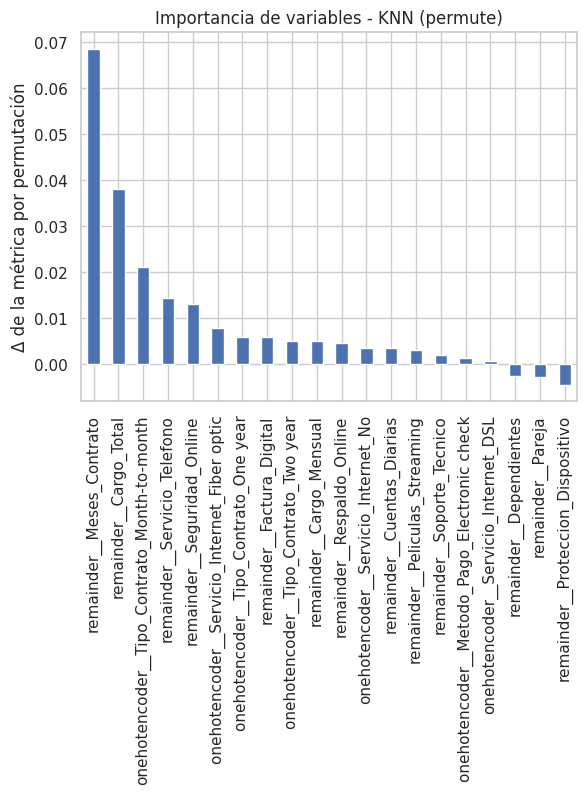

In [171]:
# 0) Asegura los nombres de columnas que salen del OneHot/ColumnTransformer
#    Si usaste OneHotEncoder directo:
feature_names = one_hot.get_feature_names_out(columnas)

# 1) Normaliza y vuelve DataFrame (sin index)
X_train_normalizado = pd.DataFrame(
    normalizacion.fit_transform(X_train),    # X_train puede ser ndarray
    columns=feature_names
)
X_val_normalizado = pd.DataFrame(
    normalizacion.transform(X_val),
    columns=feature_names
)

# 2) Entrena el KNN con el set normalizado
modelo_knn.fit(X_train_normalizado, y_train)

# 3) Importancia por permutación (usa la métrica que te importa)
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score

scorer = make_scorer(recall_score, pos_label=1)  # o 'accuracy'
result = permutation_importance(
    modelo_knn,
    X_val_normalizado, y_val,
    scoring=scorer,
    n_repeats=20,
    random_state=42
)

importancias_knn = pd.Series(result.importances_mean, index=feature_names)
ax = importancias_knn.sort_values(ascending=False).head(20).plot(kind='bar')
ax.set_title("Importancia de variables - KNN (permute)")
ax.set_ylabel("Δ de la métrica por permutación")


##7.2 **Informe Final de Evaluación de Modelos y Selección**
**A. Introducción**

  En este proyecto se evaluaron dos enfoques principales para la predicción de cancelaciones (churn) en el dataset de TelecomX: Árbol de Decisión (Decision Tree) y K-Nearest Neighbors (KNN). El análisis incluyó preprocesamiento de datos, balanceo de clases, normalización, validación cruzada, evaluación de métricas y análisis de importancia de variables. Finalmente, se determinó que KNN presentaba un desempeño más adecuado para el objetivo del problema.

**B. Preparación de Datos**

  Antes del modelado, se aplicaron los siguientes pasos:

  Limpieza y estandarización: tratamiento de inconsistencias y generación de nuevas variables como "Meses_Contrato".

  Encoding: transformación de variables categóricas a numéricas mediante técnicas de codificación.

  Balanceo de clases: uso de SMOTE y NearMiss para oversampling y undersampling.

  Normalización Min-Max (solo para KNN): igualar el rango de valores de todas las características a [0, 1], paso importante en modelos basados en distancia para evitar sesgos.

**C. Análisis de Overfitting y Underfitting**

  Decision Tree mostró indicios de underfitting en la clase positiva: su baja sensibilidad indica que no logra capturar patrones relevantes de la clase minoritaria.

  KNN con oversampling logró un mejor equilibrio, sin indicios claros de overfitting, aunque su intervalo de confianza muestra variabilidad según la partición de datos.

  KNN con undersampling perdió información valiosa, reduciendo el rendimiento.

**D. Importancia de Variables**

  En Decision Tree, las variables más importantes se identificaron mediante feature_importances_, destacando factores como duración del contrato y tipo de servicio.

  En KNN, se aplicó permutation importance para estimar el impacto de cada característica en el cálculo de distancias. Variables relacionadas con el tiempo de permanencia, tipo de plan y pagos mensuales resultaron ser las de mayor peso, lo que concuerda con la lógica de negocio y las métricas obtenidas.

**E. Justificación de la elección de KNN**

  Aunque el Árbol de Decisión presentó mejor accuracy global, su bajo recall en la clase positiva lo hace menos adecuado para el objetivo principal: detectar de forma temprana a los clientes con mayor riesgo de cancelar.
  En problemas de churn, es más crítico minimizar falsos negativos que falsos positivos, ya que identificar a un cliente en riesgo permite tomar acciones preventivas.
  El KNN con oversampling ofrece:

  Mejor recall en clase positiva.

  Mejor equilibrio entre precisión y sensibilidad.

  Mayor capacidad para adaptarse a la estructura real de los datos tras la normalización y balanceo.

**F. Conclusión**

  El análisis integral de métricas, validación cruzada, intervalos de confianza e importancia de variables respalda la elección de KNN con oversampling y normalización Min-Max como el modelo más adecuado para este caso.
  Este modelo, aunque ligeramente inferior en exactitud global, maximiza la detección de la clase positiva, que es el objetivo clave para la retención de clientes.
  Se recomienda, para futuras iteraciones, explorar ajustes adicionales en el número de vecinos y métricas de distancia, así como evaluar modelos de ensamble que combinen las fortalezas de KNN y árboles de decisión.